# LA Census Tract Clustering with Location Based Socio-Economic Data

The following is a short review of the findings made from this study. We attempted to obtain a clustering of LA's census tracts to get a better understanding of the people in the city and how we break down into groups. One of the more significant findings is that LA seems to cluster into two groups better than any other number. Another finding is just how drastically different those two groups are as you will see below. 

# Feature and class size selection
For each of the following methods below, clusterings we performed in these steps:
- start with an empty data frame
- For given k value, try a clustering on the current data with one new feature at a time and record the highest silhouette score.
- keep the feature associated with the highest value by adding it to the data frame
- repeat for k in [2, 10]

In doing so we have performed forward feature selection based on silhouette score, below are the highest silhouette scores obtained for each number of clusters. You can see that the first three methods each reach their highest score with two clusters. The fourth column is the same process but with BIC score and a Guassian Mixture model. Because silhouette score is less reliable for the strength of clusters with Guassian Mixture Models, the rest of the handling of this method is not discussed moving forward. 

Best Scores During Feature Selection by k
+----+--------------------+--------------------+---------------------+--------------------+
| k  |      K-Means       |   Fuzzy C-Means    | Spectral Clustering | Gaussian Mixtures  |
+----+--------------------+--------------------+---------------------+--------------------+
| 2  | 0.9890491383644109 | 0.9990105217670942 |  0.9154063327480811 | -704283.9886286079 |
| 3  | 0.9544693765180555 | 0.9623490571421669 |  0.9001266392305117 | -714129.2322718332 |
| 4  | 0.9162916183185735 | 0.960310299042443  |  0.8999092118815414 | -715482.3466343214 |
| 5  | 0.9142120221858543 | 0.956208570119333  |  0.8908654414184772 | -716403.5585898616 |
| 6  | 0.9098099615818267 | 0.9527593308430251 |  0.9001721225702649 | -712155.0380452202 |
| 7  | 0.9099624567979451 | 0.9493068868891797 |  0.9003636160750227 | -710404.5969475302 |
| 8  | 0.9107209514484582 | 0.9510398935794607 |  0.8990453705009019 | -701368.2758858955 |
| 9  | 0.9110674135288356 | 0.95165375

From the results above, we have concluded that k = 2 clusters should be used moving forward. Below, you can see the results of feature selection with two clusters on each method. The x-axis is the total number of features used in the clustering for each iteration. The y-axis is the best score from the given iteration. 

# K-Means

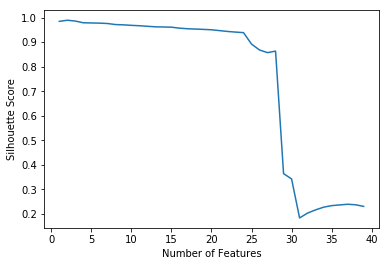

# Fuzzy C-Means

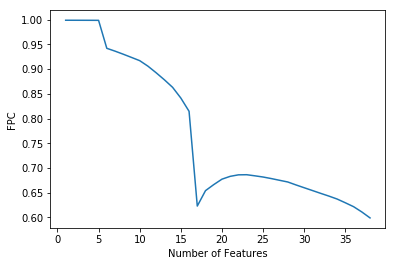

# Spectral Clustering

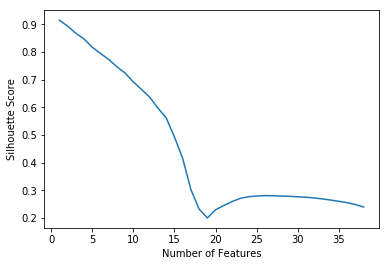

An interesting trend occurs during this process. We can see that for each method, the score drops quickly around the time we have added 17 (or at 31 for K_means) features. It then rises slowly, experiences a local maximum, and then falls again. Curiously, this sharp change in score that occurs at a local minimum coincides with the size of each class balancing out. Up until a certain feature is added, we experience high scores but very uneven classes which calls into question the strength of a clustering that has one cluster with 90% of the data in it. What is even more intersting however is that for each method, it was the same feature that caused the score to begin to increase again: White population. This feature, when considered, also led to even class sizes with each around 1,200 tracts. This is to say that when white population is considered, two distinct classes of legitimate size are uncovered.

After discovering this, we decided it would be best to choose the features included when the score experienced the local maximum after white population was added since this led to the best score with even cluster sizes. Additionally, we took the intersection of each group of featuers selected and re-clustered based on those features. This led to an additional bump in silhouette score for all methods. K-Means had the highest of those scores at 0.341.

# Final Clusters
Below we display the results for the final clustering done with K-Means and the intersecting features as discussed above. For the numbers you see below: each tract is clustered, then the average of each feature is displyed aggregated by cluster. 


class 1 size: 1245
class 0 size: 1063
+-----------------------------------------+----------+----------+
|                 Feature                 | class 0  | class 1  |
+-----------------------------------------+----------+----------+
|            Average Rent Price           | 1585.47  | 1094.85  |
|         Population Under Age 18         |  19.24   |  27.05   |
|          Population Ages 18-24          |   8.92   |  11.62   |
|          Population Ages 25-34          |   14.8   |   16.0   |
|          Population Ages 35-44          |  14.57   |  14.22   |
|          Population Ages 45-54          |  15.16   |  12.74   |
|          Population Ages 55-64          |  12.62   |   9.24   |
|        Population Ages 65 & Older       |  14.69   |   9.14   |
|             White Population            |  50.52   |   9.1    |
|             Black Population            |   6.32   |   9.51   |
|           Hispanic Population           |  22.29   |  68.86   |
|             Asian Population       